# First Convolutional Neural Network
In diesem Notebook wenden wir das erste Convolutional Neural Network auf den DogsvsCats Datensatz an.

## Loading Packages

In [1]:
import pandas as pd
import numpy as np
import os, shutil


import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

2024-05-10 17:45:04.231209: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 17:45:04.929368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'module://matplotlib_inline.backend_inline'

## Loading Data

In [3]:
# Create a smaller dataset

original_dataset_dir = 'dogsvscats/train'

base_dir = 'dogsvscats_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

### Laden der Pfade, falls das Verzeichnis "dogsvscats_small" schon generiert wurde

In [4]:
original_dataset_dir = 'dogsvscats/train'

base_dir = 'dogsvscats_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

## Control of the data

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dogs images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dogs images: 1000
total validation cat images: 500
total validation dogs images: 500
total test cat images: 500
total test dogs images: 500


## Data Gathering with Generator
To import pictures into python for computer vision, the following steps need to be done:
1. Read the picture files
2. Decode teh JPEG content to RGB grids of pixels
3. Convert these into floating point tensors
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval

All these step are automated by the `ImageDataGenerator` function in the `keras.preprocessing.image` module.

In [6]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.


Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape (20,)


## Building Model

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                                 input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/home/staudtyves/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-10 17:50:13.906617: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6789 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:21:00.0, compute capability: 7.5


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling Model

In [10]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])

## Fitting Model

In [11]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator
)

Epoch 1/30


/home/staudtyves/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715356228.672777    4940 service.cc:145] XLA service 0x7fc8b0005400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715356228.672842    4940 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-05-10 17:50:28.718833: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-10 17:50:28.872180: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.4720 - loss: 0.7036

I0000 00:00:1715356230.608212    4940 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - acc: 0.5154 - loss: 0.6953 - val_acc: 0.5500 - val_loss: 0.6818
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - acc: 0.5523 - loss: 0.6819 - val_acc: 0.6010 - val_loss: 0.6583
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.6132 - loss: 0.6555 - val_acc: 0.5900 - val_loss: 0.6666
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.6275 - loss: 0.6396 - val_acc: 0.6570 - val_loss: 0.6115
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - acc: 0.6805 - loss: 0.5875 - val_acc: 0.6660 - val_loss: 0.6058
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.7147 - loss: 0.5596 - val_acc: 0.6650 - val_loss: 0.6052
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - acc: 0.7492 - loss: 0.5322 - val_acc: 0.6880 - val_loss: 0.5770
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.7203 - loss: 0.5329 - val_acc: 0.6890 - val_loss: 0.5883
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc:

## Visualisation of the Results

<Figure size 640x480 with 0 Axes>

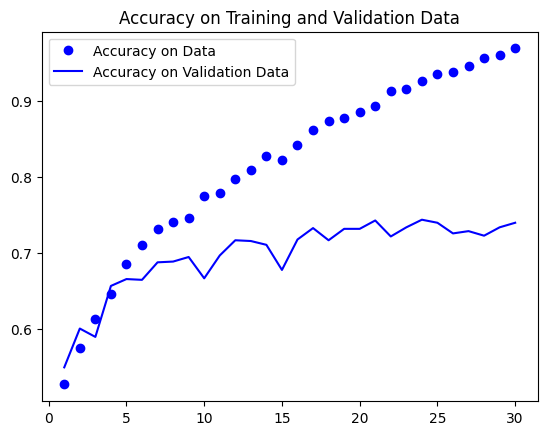

<Figure size 640x480 with 0 Axes>

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Accuracy on Data')
plt.plot(epochs, val_acc, 'b', label = 'Accuracy on Validation Data')
plt.title('Accuracy on Training and Validation Data')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

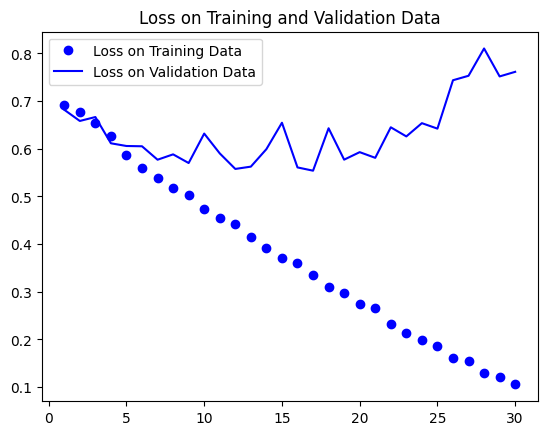

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'bo', label='Loss on Training Data')
plt.plot(epochs, val_loss, 'b', label = 'Loss on Validation Data')
plt.title('Loss on Training and Validation Data')
plt.legend()
plt.figure()

## Model Prediction using Test Data

In [14]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [15]:
result = model.evaluate(test_generator)
print("test loss, test accuracy:", result)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7399 - loss: 0.8096
test loss, test accuracy: [0.7464983463287354, 0.75]


In [16]:
predict = model.predict(test_generator)
predict

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


array([[7.68848583e-02],
       [9.71301317e-01],
       [9.28397059e-01],
       [5.84232919e-02],
       [3.41467410e-02],
       [1.41156046e-03],
       [8.70069191e-02],
       [4.59068315e-03],
       [9.93961513e-01],
       [2.03810800e-02],
       [1.00442268e-01],
       [1.40792042e-01],
       [1.25360573e-02],
       [8.44029651e-04],
       [2.72434390e-05],
       [6.96832418e-01],
       [9.67011690e-01],
       [1.86908916e-02],
       [5.03516972e-01],
       [4.85967577e-01],
       [2.26069726e-02],
       [9.86908019e-01],
       [8.42357054e-02],
       [6.02466380e-03],
       [9.98502731e-01],
       [1.22867756e-01],
       [8.17203708e-03],
       [1.24409936e-01],
       [1.87293384e-02],
       [9.99979734e-01],
       [9.99421895e-01],
       [5.17178746e-03],
       [9.32269335e-01],
       [7.50008464e-01],
       [2.95731352e-05],
       [6.89550955e-03],
       [9.98553693e-01],
       [9.97817755e-01],
       [2.10136129e-03],
       [9.29917753e-01],


In [17]:
def label(predict):

    prediction_array = np.where(predict > 0.5, 'Dog', 'Cat')

    return prediction_array

In [18]:
df_test = pd.DataFrame({'file': test_generator.filenames , 'label_prediction': label(predict).flatten()})
df_test

,file,label_prediction
0,cats/cat.1500.jpg,Cat
1,cats/cat.1501.jpg,Dog
2,cats/cat.1502.jpg,Dog
3,cats/cat.1503.jpg,Cat
4,cats/cat.1504.jpg,Cat
...,...,...
995,dogs/dog.1995.jpg,Dog
996,dogs/dog.1996.jpg,Cat
997,dogs/dog.1997.jpg,Dog
998,dogs/dog.1998.jpg,Cat
